# Agent Utilization Analysis in Valorant Champions 2024

This notebook analyzes agent statistics from the VCT 2024 Seoul dataset. The focus is on understanding agent utilization, both overall and on a per-map basis. We will perform data cleaning, transformation, and visualization to uncover trends in agent popularity.

## 1. Setup

First, we import the necessary Python libraries for data manipulation and visualization.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

## 2. Load and Inspect Data

We load the `agents_stats.csv` file into a pandas DataFrame and display the first few rows and data types to get an initial understanding of the data.

In [2]:
agent_stats_df = pd.read_csv("VCT_2024_seoul_dataset/agents_stats.csv")
print(agent_stats_df.head())
print("\n")
agent_stats_df.info()

  agent_name  total_utilization  \
0       Omen               62.0   
1       Sova               52.0   
2      Viper               50.0   
3     Cypher               42.0   
4       Raze               41.0   

                                    map_utilizations  
0  {'Lotus': 100.0, 'Bind': 13.0, 'Sunset': 93.0,...  
1  {'Lotus': 0.0, 'Bind': 0.0, 'Sunset': 75.0, 'A...  
2  {'Lotus': 68.0, 'Bind': 90.0, 'Sunset': 0.0, '...  
3  {'Lotus': 18.0, 'Bind': 17.0, 'Sunset': 93.0, ...  
4  {'Lotus': 75.0, 'Bind': 87.0, 'Sunset': 46.0, ...  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   agent_name         27 non-null     object 
 1   total_utilization  27 non-null     float64
 2   map_utilizations   27 non-null     object 
dtypes: float64(1), object(2)
memory usage: 780.0+ bytes


## 3. Data Cleaning and Transformation

The `map_utilizations` column is currently a string representation of a dictionary. To make it usable for analysis, we need to perform the following steps:
1. Use the `ast.literal_eval` function to safely evaluate the string and convert it into a Python dictionary.
2. Apply `pd.Series` to the new dictionary column to expand it, creating a new column for each map.
3. Concatenate this new map data with the original `agent_name` and `total_utilization` columns to create a clean, wide-format DataFrame.

In [3]:
agent_stats_df['map_data'] = agent_stats_df['map_utilizations'].apply(ast.literal_eval)
map_util_df = agent_stats_df['map_data'].apply(pd.Series)
agent_stats_df = pd.concat([agent_stats_df[["agent_name","total_utilization"]],map_util_df],axis = 1)

agent_stats_df.head()

,agent_name,total_utilization,Lotus,Bind,Sunset,Abyss,Icebox,Haven,Ascent
0,Omen,62.0,100.0,13.0,93.0,50.0,0.0,100.0,88.0
1,Sova,52.0,0.0,0.0,75.0,96.0,92.0,89.0,100.0
2,Viper,50.0,68.0,90.0,0.0,21.0,100.0,17.0,0.0
3,Cypher,42.0,18.0,17.0,93.0,75.0,0.0,78.0,38.0
4,Raze,41.0,75.0,87.0,46.0,0.0,0.0,6.0,0.0


## 4. Exploratory Data Analysis (EDA)

Now that the data is clean, we can perform exploratory data analysis to visualize agent utilization.

### 4.1 Distribution of Total Agent Utilization

This histogram shows the distribution of the `total_utilization` percentage across all agents. The Kernel Density Estimate (KDE) line helps visualize the shape of the distribution.

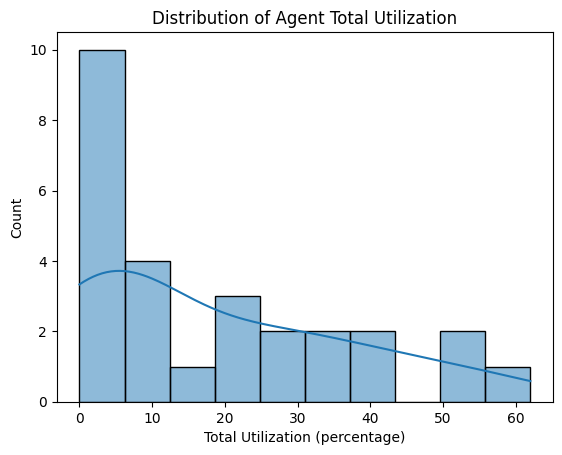

In [4]:
sns.histplot(agent_stats_df["total_utilization"] , bins = 10, kde = True)
plt.title("Distribution of Agent Total Utilization")
plt.xlabel("Total Utilization (percentage)")
plt.ylabel("Count")
plt.show()

### 4.2 Agent Utilization by Map (Heatmap)

The heatmap provides a comprehensive overview of which agents are popular on which maps. The color intensity represents the utilization percentage, making it easy to spot strong agent-map preferences.

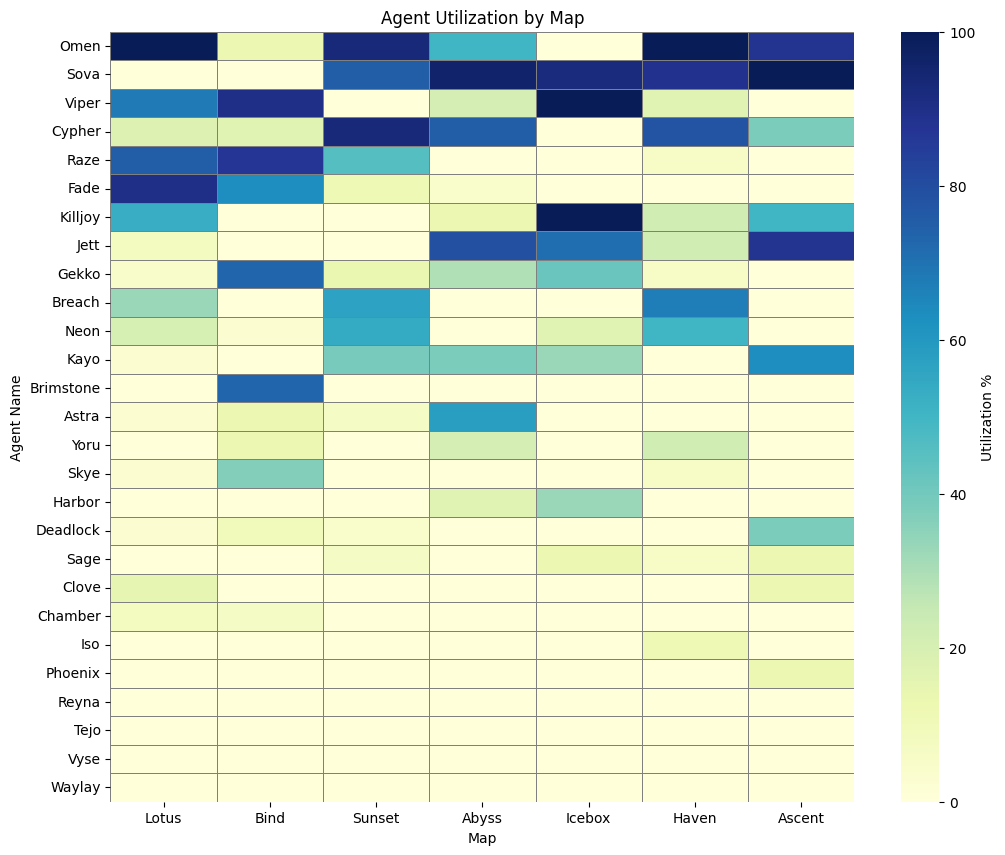

In [5]:
map_cols =[c for c in agent_stats_df.columns if c not in ['agent_name', 'total_utilization']]
plt.figure(figsize=(12, 10))
sns.heatmap(agent_stats_df.set_index('agent_name')[map_cols].fillna(0),cmap = 'YlGnBu', linewidths= 0.5, linecolor= 'gray',cbar_kws= {'label' : "Utilization %"})
plt.title('Agent Utilization by Map')
plt.xlabel('Map')
plt.ylabel('Agent Name')
plt.show()

### 4.3 Boxplot of Agent Utilization per Map

This boxplot shows the distribution of agent utilization percentages for each map. It helps in understanding the variance and median utilization on different maps, highlighting which maps have a more diverse agent pool.

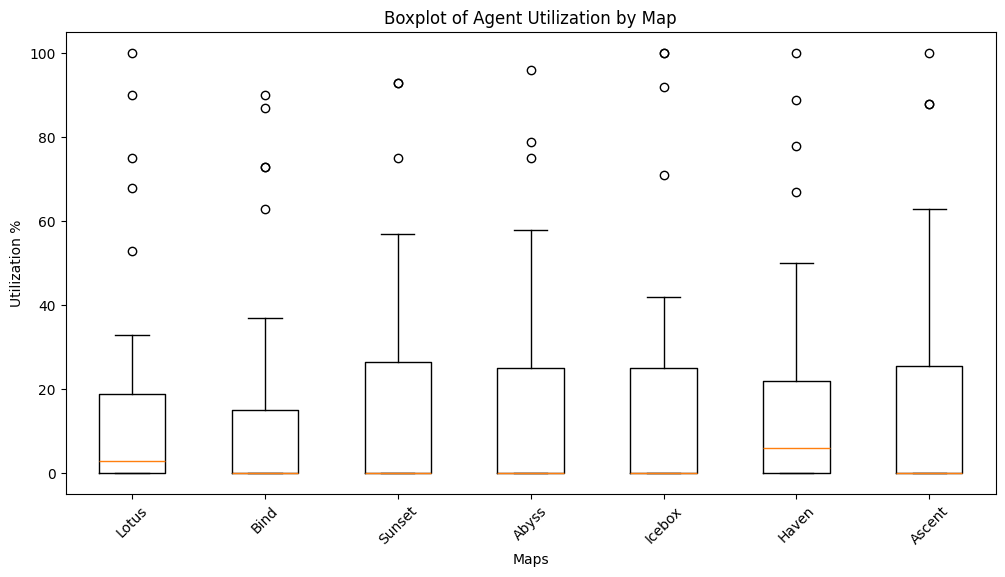

In [6]:
plt.figure(figsize=(12, 6))
plt.boxplot(agent_stats_df[map_cols].fillna(0).values)
plt.xticks(ticks = range(1, len(map_cols) + 1), labels = map_cols, rotation = 45)
plt.title("Boxplot of Agent Utilization by Map")
plt.xlabel("Maps")
plt.ylabel("Utilization %")
plt.show()

### 4.4 Top 5 Most Utilized Agents per Map

Finally, we generate bar charts to explicitly show the top 5 most used agents for each map. This gives a clear and direct view of the meta on each map.

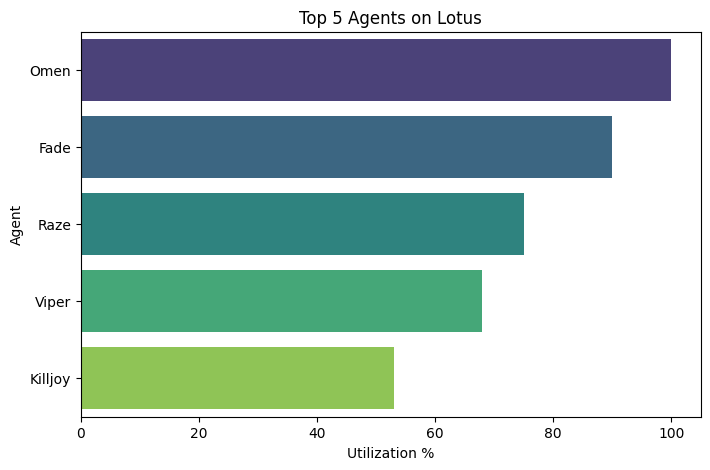

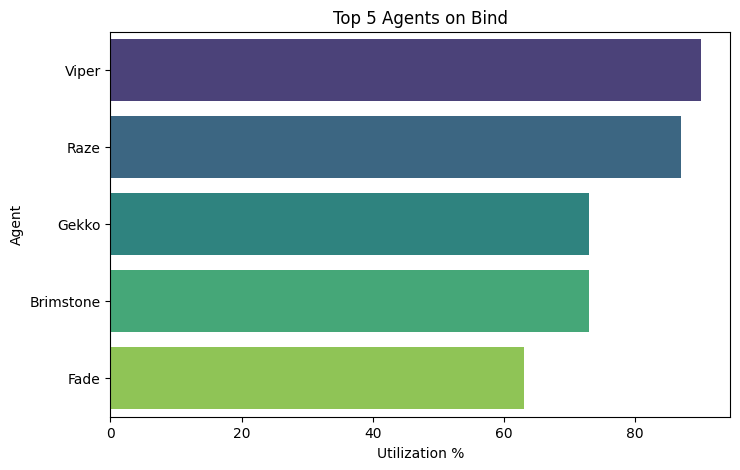

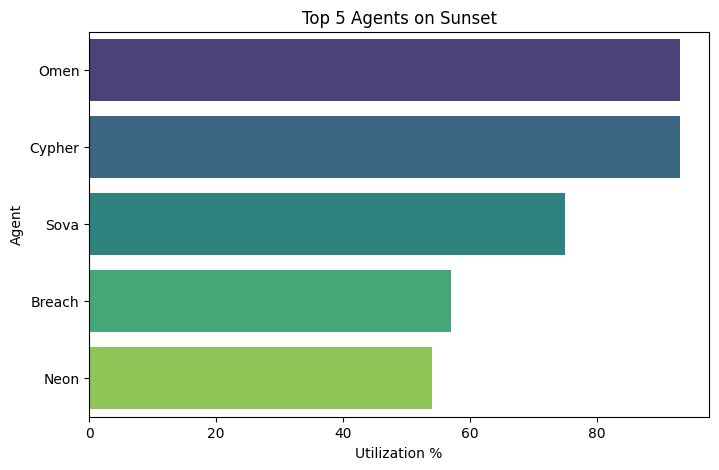

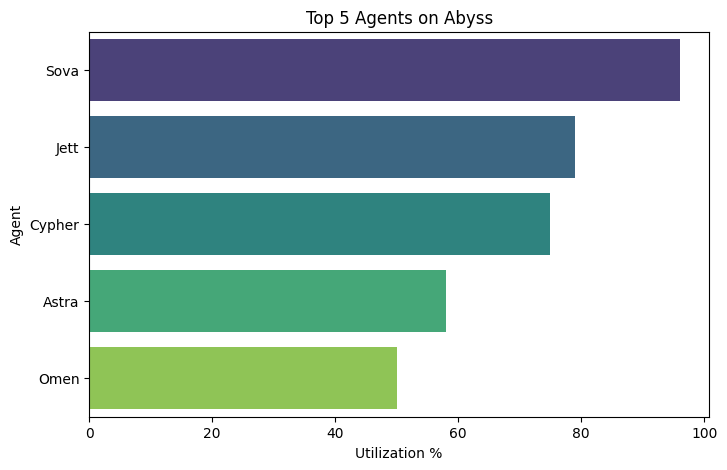

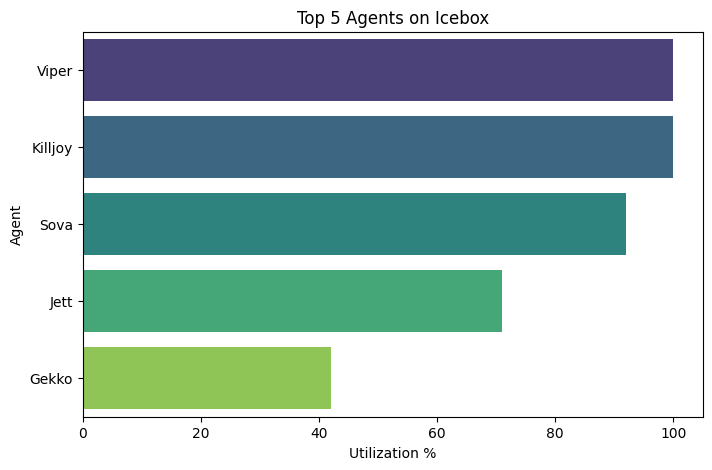

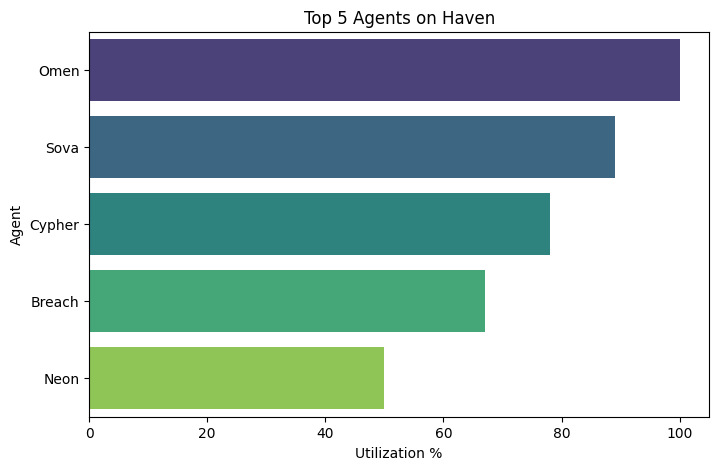

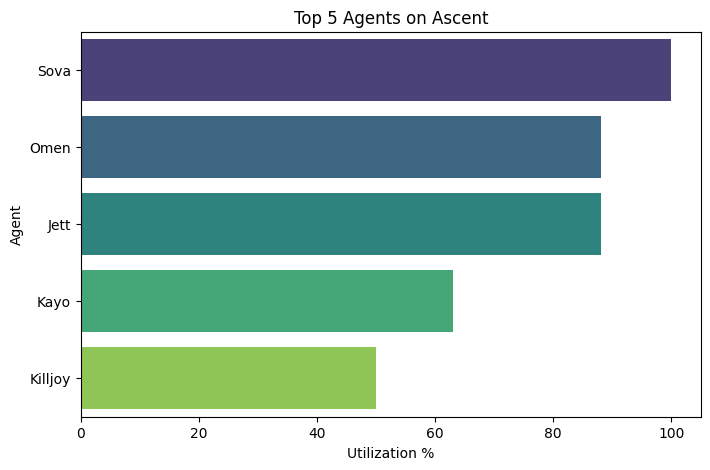

In [8]:
for map_name in map_cols:
    top_5_agents = agent_stats_df.nlargest(5, map_name)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=map_name, y='agent_name', data=top_5_agents, palette='viridis', hue = 'agent_name')
    plt.title(f'Top 5 Agents on {map_name}')
    plt.xlabel('Utilization %')
    plt.ylabel('Agent')
    plt.show()